# Linear Model for Binary Classification

Lab exercise authors : Corro, with original parts by Labeau, Baskiotis, Salmon, Gramfort, Mozharovskyi.

For this lab exercise, check the documentation/tutorial of the python librairies that we will use if you need help on how to use a specific function:
- http://www.python.org
- http://scipy.org
- http://www.numpy.org
- http://scikit-learn.org/stable/index.html
- http://www.loria.fr/~rougier/teaching/matplotlib/matplotlib.html and https://matplotlib.org/stable/users/index

## 1. Introduction

In this lab exercise, we will work on a first practical application of supervised learning, which is arguably the simplest one: **supervised binary classification**. We will generate artificial data from two different sources, and we will try to learn a classifier that will be able to separate the data, using the a linear model.

Definitions and notations :

- $\mathcal{X}$ *input/examples/observations/samples* space, in our case inputs are of the form $\mathbf{x} = (x_1, x_2, ..., x_d) \in \mathbb{R}^d$. We call $x_j$ the value taken by the $j$-th variable of $\mathbf{x}$, or its $j$-th *feature*.
- $\mathcal{Y}$ is the set of labels, or output space. We are in the **binary** case: there is only two possible labels. We choose to note them $\{ -1, 1\}$, which will make things easy by allowing us to work with the ```sign``` function.
- $\mathcal{D}_n = \{(x_i, y_i), i=1, .., n\}$ is a dataset containing $n$ examples and their labels. 
- There exists a probabilistic model governing the generation of our data given i.i.d random variables $X$ and $Y$: $\forall i \in \{ 1, ..., n \}, (x_i, y_i) \sim (X, Y)$
- We would like to build, from $\mathcal{D}_n$, a function that we call a *classifier*, $$f: \mathcal{X} \rightarrow \{ -1, 1 \}$$ which for a new data point $\mathbf{x}_{new}$ will give a label $f(\mathbf{x}_{new})$.

In [1]:
# just some useful imports and definitions.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
from matplotlib import rc

symlist = ['o', 'p', '*', 's', '+', 'x', 'D', 'v', '-', '^']

#rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)


## 2. Generating artificial data 

For our first experiment, and in order to visualize what is happening, we will work with only two features (so, with $d=2$) so that we can plot the data and the classifier. 

1) Take a look at the function ```rand_gauss(n, mu, sigma)```: this function returns $n$ samples following the multi-dimensional normal distribution, with mean the vector $\mu =$ ```mu```, and with the covariance matrix $\Sigma$ being the diagonal matrix of the vector ```sigmas``` $=[ \sigma_1, \sigma_2]$. Hence, the matrix $$\Sigma = \begin{pmatrix}
\sigma_1&0 \\
0 &\sigma_2
\end{pmatrix}$$
Now, generate different datasets from the function ```rand_bi_gauss``` function. What does the second output correspond to ? 

In [2]:
def rand_gauss(n=100, mu=[1, 1], sigmas=[0.1, 0.1]):
    """Sample  points from a Gaussian variable.
    Parameters
    ----------
    n : number of samples
    mu : mean
    sigma : standard deviation
    """
    d = len(mu)
    res = np.random.randn(n, d)
    return np.array(mu + res * sigmas)


def rand_bi_gauss(n1=100, n2=100, mu1=[1, 1], mu2=[-1, -1], sigmas1=[0.1, 0.1],
                  sigmas2=[0.1, 0.1]):
    """Sample points from two Gaussian distributions.
    Parameters
    ----------
    n1 : number of sample from first distribution
    n2 : number of sample from second distribution
    mu1 : center for first distribution
    mu2 : center for second distribution
    sigma1: std deviation for first distribution
    sigma2: std deviation for second distribution
    """
    ex1 = rand_gauss(n1, mu1, sigmas1)
    ex2 = rand_gauss(n2, mu2, sigmas2)
    y = np.hstack([np.ones(n1), -1 * np.ones(n2)])
    X = np.vstack([ex1, ex2])
    ind = np.random.permutation(n1 + n2)
    return X[ind, :], y[ind]

<div class='alert alert-block alert-info'>
            Code:</div>

In [ ]:
# TODO:
# you can try to play with rand_gauss to understand what it does

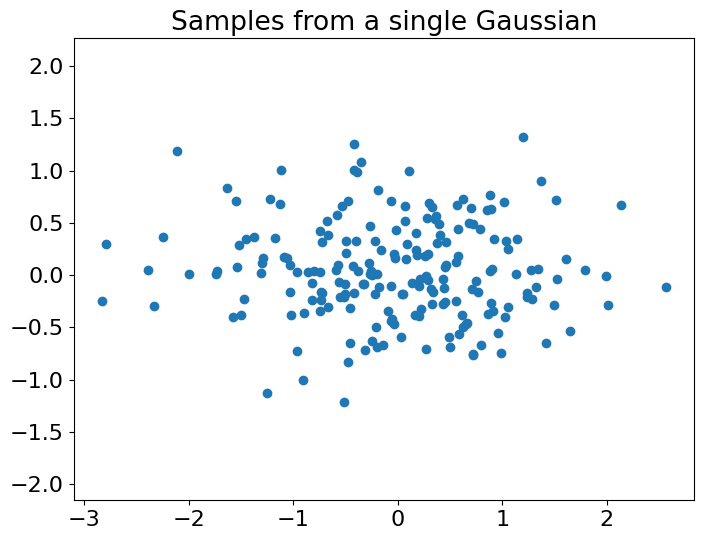

In [3]:
X = rand_gauss(200, mu=[0, 0], sigmas=[1, 0.5])
plt.scatter(X[:, 0], X[:, 1])
plt.title("Samples from a single Gaussian")
plt.axis('equal')
plt.show()

# It returns n points sampled from a d-dimensional Gaussian with diagonal covariance (sigmas²) and center mu.

In [ ]:
# TODO:
# Generate a dataset using rand_bi_gauss.
# For example:
# - 20 datapoints for each class
# - use mean [1., 1.] for one class and [-1., -1.] for the other
# - you can fix the standard deviation to something like 0.9
# Print the generate data
#
# You should store the data in a matrix X1 and a vector y1
# (do not use the np.matrix object for the matrix, just a simple numpy tenshor as returned by the function)

X1 (features):
 [[ 1.4826537   3.44633154]
 [-1.44561984 -1.4634641 ]
 [ 0.49411343 -0.57609034]
 [ 0.38227241  1.51026996]
 [ 0.08139967 -1.71077477]
 [-0.98855697  0.30991059]
 [ 1.5480964   1.99534948]
 [-1.84782953 -1.64259445]
 [-1.33508055 -0.09066741]
 [-0.55412427 -1.33959566]
 [-0.88830962  1.72819373]
 [-1.842116    0.10181204]
 [ 2.01819006  1.46365286]
 [ 1.07940559  0.85754933]
 [-0.23087406 -0.94692581]
 [ 1.49164851  1.33040125]
 [ 0.50326501  0.93841902]
 [-0.02395625 -1.94322322]
 [-2.66877756 -1.87813678]
 [ 1.95324294  1.70484948]
 [ 0.56331022  1.96797044]
 [ 0.3126759   0.32616927]
 [ 2.46695676  0.68670754]
 [ 0.20110916 -2.76237719]
 [-1.23636785 -1.40640291]
 [ 0.57121025  0.79612663]
 [-0.30472104 -1.02643295]
 [ 2.21187545  1.18690934]
 [ 1.39311949 -2.45049107]
 [ 1.50795599  0.80410908]
 [ 0.66646442  0.12704747]
 [-1.37900859 -0.12577213]
 [-1.47299808 -0.17945219]
 [-1.6608381  -0.43399359]
 [ 1.73578558  0.4884517 ]
 [-2.46733691 -1.07174913]
 [-0.8712941

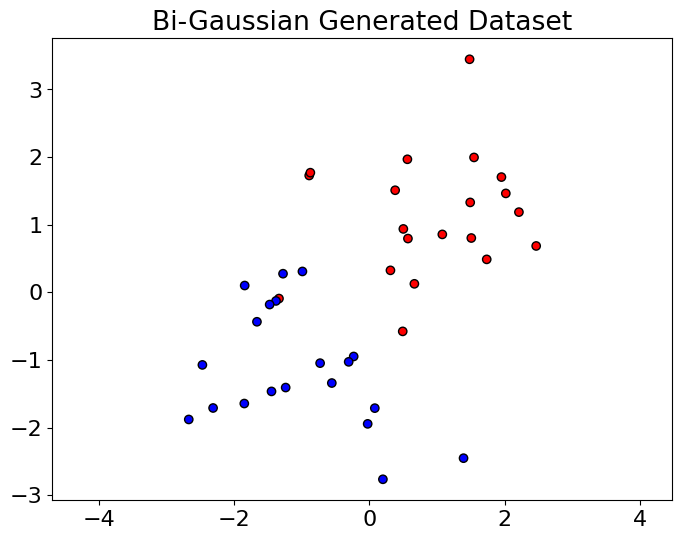

In [5]:
X1, y1 = rand_bi_gauss(
    n1 = 20,
    n2 = 20,
    mu1 = [1., 1.],
    mu2 = [-1., -1.],
    sigmas1 = [0.9, 0.9],
    sigmas2 = [0.9, 0.9]
)

print("X1 (features):\n", X1)
print("\ny1 (labels):\n", y1)

plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='bwr', edgecolors='k')
plt.title("Bi-Gaussian Generated Dataset")
plt.axis('equal')
plt.show()

We can now plot the data using the ```plot_2d``` function below.

What do you observe? Is it linearly separable? (you can try to generate and plot different datasets from the same distribution)

In [6]:
def plot_2d(X, y, a=None, b=None, step=50, alpha_choice=1):
    """2D dataset data ploting according to labels.
    Parameters
    ----------
    X : data features
    y : label vector
    a, b :(optional) the separating hyperplan parameterize by a and b
    alpha_choice : control alpha display parameter
    """
    min_tot0 = np.min(X[:, 0])
    min_tot1 = np.min(X[:, 1])

    max_tot0 = np.max(X[:, 0])
    max_tot1 = np.max(X[:, 1])
    delta0 = (max_tot0 - min_tot0)
    delta1 = (max_tot1 - min_tot1)
    labels = np.unique(y)
    k = np.unique(y).shape[0]

    for i, label in enumerate(y):
        label_num = np.where(labels == label)[0][0]
        plt.scatter(X[i, 0], X[i, 1],
                    c=np.reshape(cm.tab10(label_num), (1, -1)),
                    s=80, marker=symlist[label_num])
    plt.xlim([min_tot0 - delta0 / 10., max_tot0 + delta0 / 10.])
    plt.ylim([min_tot1 - delta1 / 10., max_tot1 + delta1 / 10.])
    if a is not None:
        plt.plot([min_tot0, max_tot0],
                 [min_tot0 * -a[0] / a[1] - b / a[1],
                  max_tot0 * -a[0] / a[1] - b / a[1]],
                 "k", alpha=alpha_choice)

<div class='alert alert-block alert-info'>
            Code:</div>

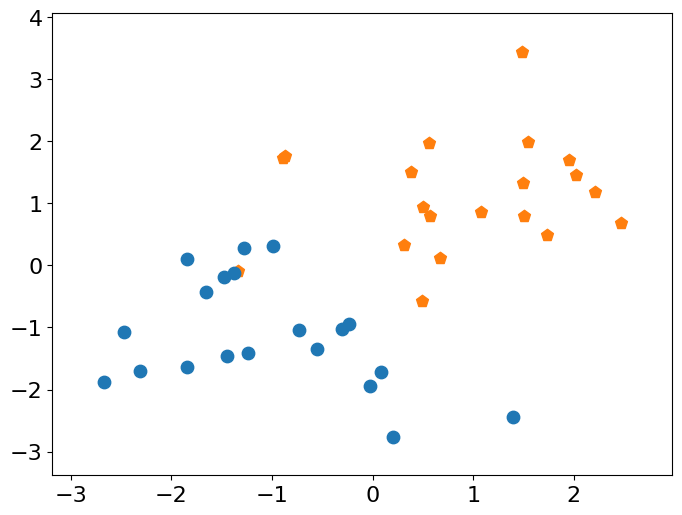

In [7]:
# Plot your generated data 
plot_2d(X1, y1)

## 3. Linear classifiers (affine)

A **linear classifier** is a classifier associating to each observation $x$ a label in $\mathcal{Y}$ given its position related to an **affine hyperplane**. Each linear classifier is therefore linked to an affine hyperplan of $\mathbb{R}^d$, which we define by its **directing vector** (or normal vector) $\mathbf{a} = (a_1, ..., a_d) \in \mathbb{R}^{d}$ and an intercept term $b \in \mathbb R$ (in French, *ordonnée à l'origine*). Geometrically, this allows the hyperplane to not go through the origin, and be shifted anywhere in the space. 

The hyperplane is then given by:
$$ H_{\mathbf{a}, b}=\left\{ \mathbf{x} \in \mathbb{R}^{d} : b +\sum_{j=1}^d a_j x_j=0 \right\}. $$

In order to classify an observation $\mathbf{x}$ (i.e, affect a label $1$ or $-1$, we use the function $sign(b +\sum_{j=1}^d a_j x_j)$, where the $sign$ function is defined as:
$$ sign(x)=
\begin{cases}
 1,& \text{ si } x\geq0,\\
-1,& \text{ si } x<0
\end{cases}
\enspace . $$

Hence, the function  $\mathbf{x} \mapsto sign ( b +\sum_{j=1}^d a_j x_j )$ is the binary classifier of linear separation defined by $\mathbf{a}$ and $b$.

Training or learning aims to find "good" parameters $\mathbb a$ and $b$ from the training data.
That is, we would like to have, on each side of the hyperplane, labels separated into homogenous groups.

For the next questions, you should reuse the datasets you obtained previously.

**Question:** What is the linear separation given by the perceptron in dimension $d=2$? See if you can find (visually) a good separation for your datasets. When is $b +\sum_{j=1}^d a_j x_j$ large ? Negative ? Positive ? How can that function be interpreted geometrically ? What does $b$ corresponds to on the linear separation you found on your data ?

<div class='alert alert-block alert-warning'>
            Answer:</div>

In [ ]:
1. What is the linear separation given by the perceptron in dimension 𝑑=2?
In R2, a linear classifier corresponds to a line, given by:
    Hab = {x in Rd: a1x1 + a2x2 + b = 0}
This line splits the plane into 2 half-spaces:
    if a1x1 + a2x2 + b > 0, we classify as +1
    if a1x1 + a2x2 + b < 0, we classify as -1
This is exactly what the perceptron algorithm tries to find: a line that correctly separates the data points.

2. When is 𝑏+∑𝑑𝑗=1𝑎𝑗𝑥𝑗 large ? Negative ? Positive ?
We have f(x) = a1x1 + a2x2 + b
If f(x) >> 0 then the point is far on the +1 side of the line
If f(x) << 0 then the point is far on the -1 side of the line
If f(x) == 0 then the point is on the separating line
So, f(x) gives us a signed distance to the line, up to a cste scale

3. How can that function be interpreted geometrically? What does 𝑏 corresponds to on the linear separation you found on your data?
The vector a is perpendicular to the separating line
The value b acts like a translation: it shifts the line up or down (or left/right)
We have: x2 = -(a1/a2)x1 - (b/a2) 
Then the slope is -a1/a2 and the intercept on the y-axis is -b/a2
-b/a2 is exactly what b controls

**Question:** Write the the function ```compute_score(x, a, b)``` that takes, as input, a vector $\mathbf{x} \in \mathbb{R}^d$ and model parameters $\mathbf{a} \in \mathbb{R}^{d}$ and $b \in \mathbb R$ and outputs the prediction $b +\sum_{j=1}^d a_j x_j$. Then, write ```predict_class(x,a,b)``` that outputs the predicted label $sign\left(b +\sum_{j=1}^d a_j x_j\right)$. Apply them to the following example, and display on the same plot your data, the hyperplane, and the two new points.

<div class='alert alert-block alert-info'>
            Code:</div>

In [8]:
def compute_score(x, a, b):
    """Compute score using parameter a and b."""
    # TODO TODO TODO
    return np.dot(a, x) + b


def predict_class(x, a, b):
    # TODO TODO TODO
    """Predict a class from at point x and parameters a and b."""
    if compute_score(x, a, b) > 0:
        return 1
    else:
        return -1

Score for test_1:  -2
Predict for test_1:  -1
Score for test_2:  2
Predict for test_2:  1


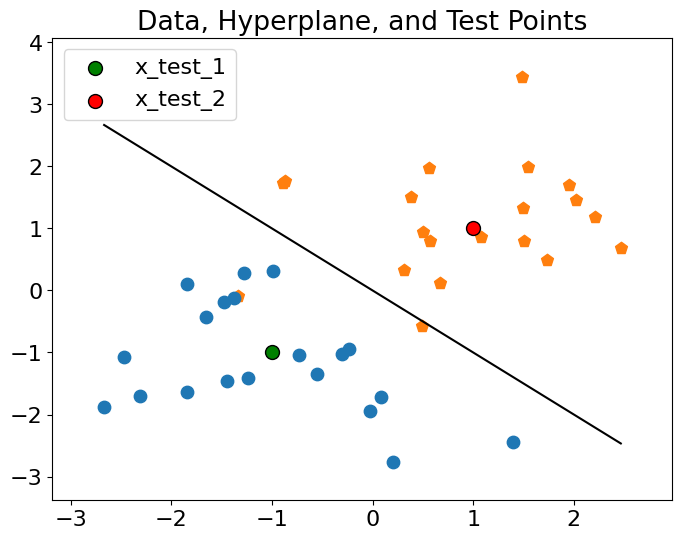

In [10]:
a1 = [1, 1] # Visually, seems like it would make an okay normal vector for a separating hyperplane
b1 = 0

x_test_1 = [-1, -1]
x_test_2 = [1, 1]

# Make predictions for these two points and display them, with the data and hyperplane. 
# - use plot_2d to plot the generate data and the separating hyperplane defined by a1 and b1
# - use plt.scatter to plot x_test_1 and x_test_2 (use two different colors using the argment `c`)

# TODO TODO TODO

print("Score for test_1: ", compute_score(x_test_1, a1, b1))
print("Predict for test_1: ", predict_class(x_test_1, a1, b1))

print("Score for test_2: ", compute_score(x_test_2, a1, b1))
print("Predict for test_2: ", predict_class(x_test_2, a1, b1))

plot_2d(X1, y1, a = a1, b = b1)
plt.scatter(x_test_1[0], x_test_1[1], c='green', label="x_test_1", s=100, edgecolors='black')
plt.scatter(x_test_2[0], x_test_2[1], c='red', label="x_test_2", s=100, edgecolors='black')

plt.legend()
plt.title("Data, Hyperplane, and Test Points")
plt.show()

## 4. Training with the perceptron loss

Training with the perceptron loss, also called the **perceptron algorithm**, consists in detecting when there is a mistake, meaning that there is a point that is misclassified, and moving $\mathbf{a}$ and $b$ towards having this point on the 'right side' of the hyperplane.

Given score $w = b +\sum_{j=1}^d a_j x_j$ and gold output $y$, the perceptron loss is defined as:

$$
    \ell(w ; y) = max(0, - yw)
$$

**Question:** analyse the gradient of this function. When is the gradient null? When is it non null? (you can assume the gradient is 0 when non-differentiable).

For a given input/output pair $(\mathbf{x}, y)$
The change in $\mathbf{a}$ and $b$ for a case when the point is misclassified is described by the following update learning rule (Rosenblatt's):
$$\mathbf{a}\leftarrow\mathbf{a}+\epsilon \mathbf{x} \cdot y$$
$$b\leftarrow b+\epsilon y$$

where $\epsilon$ is a *learning step*, which indicates how much we correct $\mathbf{a}$ and b. The method is iterative: we will go through all examples we have in our data and update the points accordingly. 

**Question:** analyse this update rule, and compare it to a gradient step using a minibatch of size 1 and the perceptron loss. What do you observe?

In [ ]:
If yw > 0, the point is well classified so l = 0 and the gradient is 0
If yw <= 0, the point is not well classified so l = -yw and the gradient is not 0
    Gradient of a: -yx <- w = b + ax <- w' = x
    Gradient of b: -y <- w = b + ax <- w' = 1
C'est exactement ce que le pas de mise à jour du perceptron applique (à un facteur de eps près), ce qui en fait une descente de gradient stochastique à minibatch de taille 1.

**Algorithm**

Then, the algorithm is as follows:

- **Data**: 
    - The observations and their labels $\mathcal{D}_n=\{(\mathbf{x}_i,y_i): 1\leq i \leq n\}$
    - The gradient step: $\epsilon$
    - The maximal number of iterations: $\rm{iter}$

- **Returns**: 
    - $\mathbf{a}$
    - $b$
- Randomly initialize $\mathbf{a}$; initialize $b=0$.
- For $k=1$ to $\rm iter$ 
    - For $i=1$ to $n$:
        - if $(b +\sum_{j=1}^d a_j [\mathbf x_i]_j) y_i \leq 0$
            - $\mathbf{a}\leftarrow\mathbf{a}+\epsilon y_i \mathbf{x}_i$ 
            - $b\leftarrow b+\epsilon y_i$
        
5. You have to complete the code for this procedure in the ```perceptron``` function:

<div class='alert alert-block alert-info'>
            Code:</div>

In [15]:
def perceptron(x, y, eps, niter, a_ini, b_ini):
    """ Perceptron algorithm:
        - x : Data
        - y : label
        - eps : learning rate
        - niter : number of iterations
        - a_ini, b_ini : initial weight
        """
    # Keep track of a and b at each iterations - the first one is a_ini and b_ini
    all_a = np.zeros((niter, a_ini.size))
    all_b = np.zeros(niter)
    
    all_a[0] = a_ini
    all_b[0] = b_ini
    
    # Implement the learning loop
    '''
    TODO TODO TODO: Complete here
    '''
    for k in range(niter):
        for i in range(x.shape[0]):
            xi = x[i]
            yi = y[i]
            
            score = np.dot(a_ini, xi) + b_ini
            
            if yi * score <= 0:
                a_ini += eps * yi * xi
                b_ini += eps * yi
        
        all_a[k] = a_ini
        all_b[k] = b_ini
    
    return all_a, all_b

6) Test the perceptron algorithm on the following parameters and look at how $\mathbf{a}$ and $b$ evolves during the iterations. 

<div class='alert alert-block alert-info'>
            Code:</div>

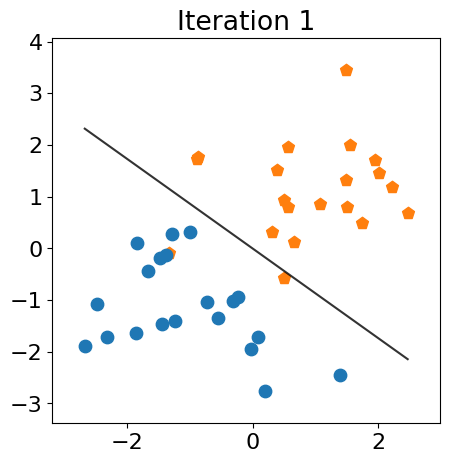

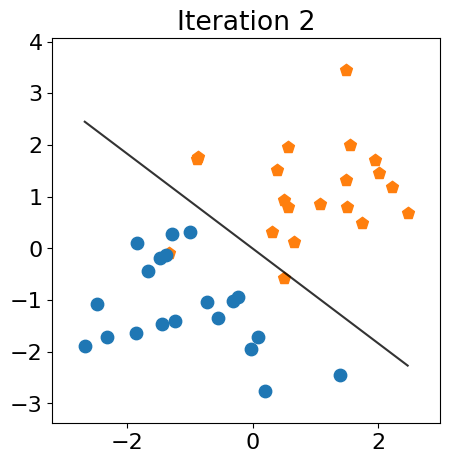

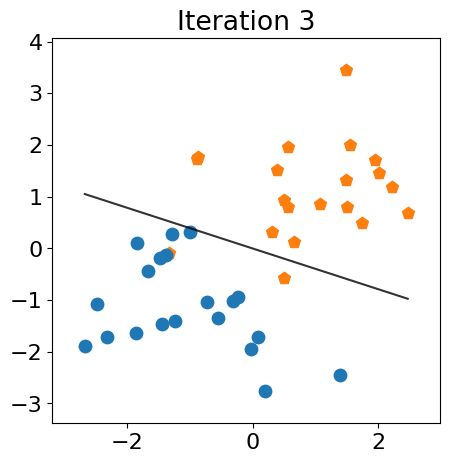

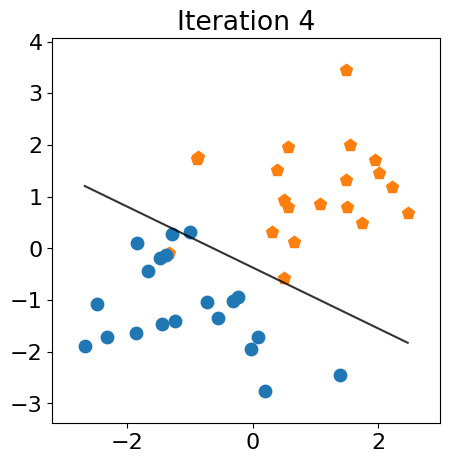

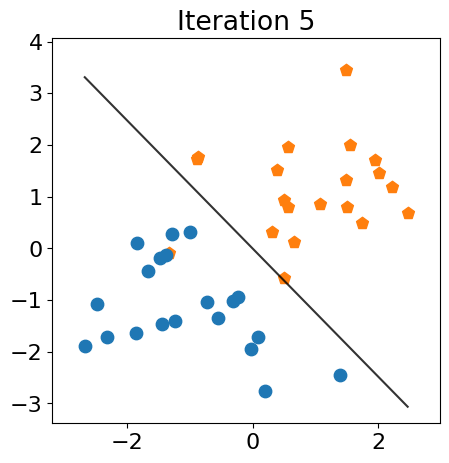

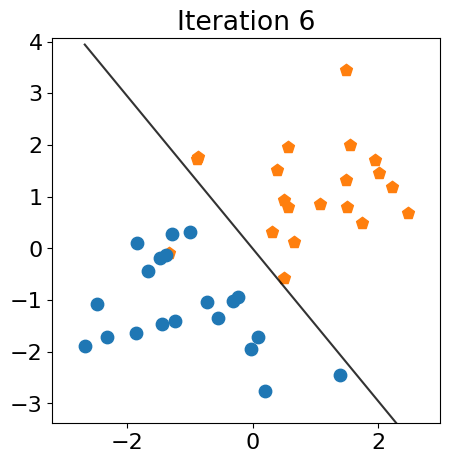

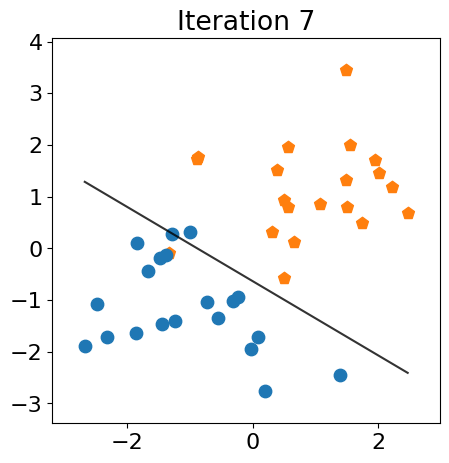

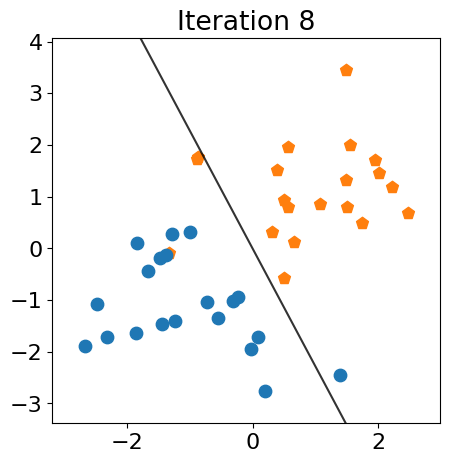

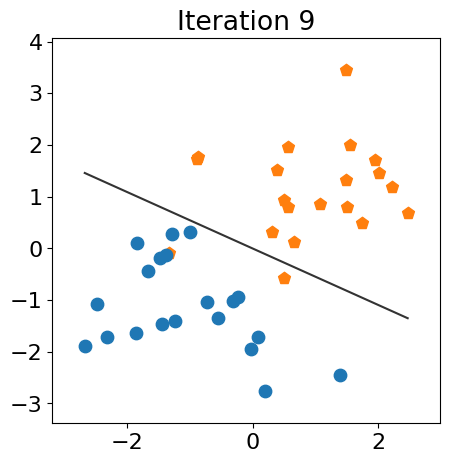

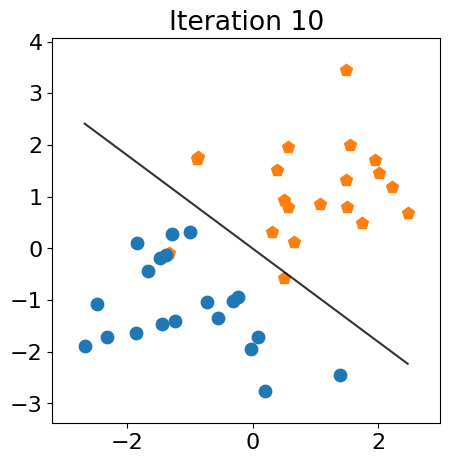

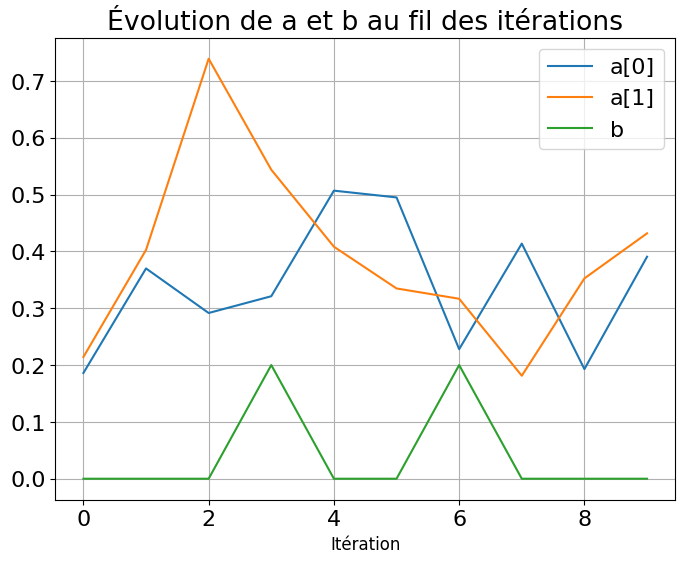

In [17]:
# Choose an epsilon
epsilon = 0.2
# A number of iterations
niter = 10
# Initialize a_ini and b_ini
std_ini = 1.
a_ini = std_ini * np.random.randn(X1.shape[1])
b_ini = 0

# Use the 'perceptron' function 
'''
Complete here
'''
a_hist, b_hist = perceptron(X1, y1, eps = epsilon, niter = niter, a_ini = a_ini, b_ini = b_ini)

for i in range (niter):
    plt.figure(figsize=(5, 5))
    plot_2d(X1, y1, a=a_hist[i], b=b_hist[i], alpha_choice=0.8)
    plt.title(f"Iteration {i+1}")
    plt.show()
    
plt.plot(range(niter), a_hist[:, 0], label="a[0]")
plt.plot(range(niter), a_hist[:, 1], label="a[1]")
plt.plot(range(niter), b_hist, label="b")
plt.title("Évolution de a et b au fil des itérations")
plt.xlabel("Itération")
plt.legend()
plt.grid()
plt.show()


Display on the same figure the evolution of the boundaries according to the iterations (remember that the function "perceptron" returns all parameters after each iteration on the dataset). We can use the ```plot_2d``` function and its ```alpha_choice``` argument for that purpose.

For this, you can use `np.arange(0., 1., 1. / float(niter))` to generate values for alphas.

<div class='alert alert-block alert-info'>
            Code:</div>

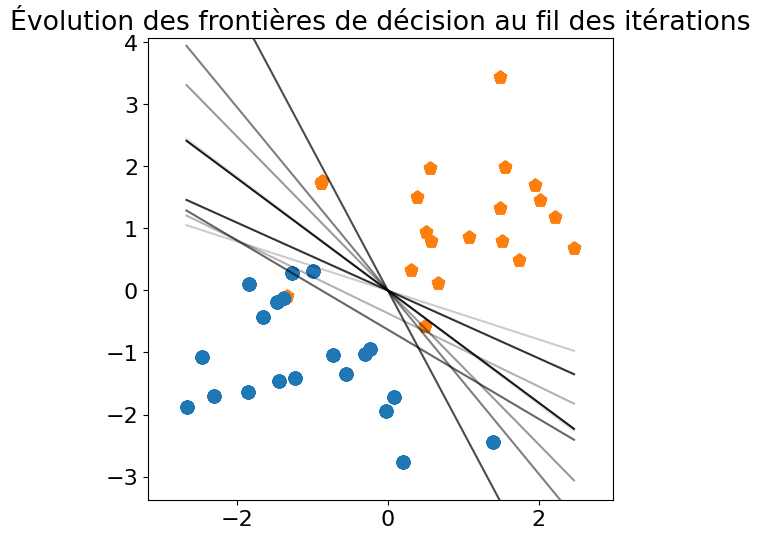

In [18]:
# Use a loop and the last argument of plot_2d to plot each hyperplane (at each iteration) 
# with decreasing transparency
'''
Complete here
'''
# Génération des transparences pour chaque itération
alpha_vals = np.arange(0., 1., 1. / float(niter))

# Affichage de toutes les frontières sur la même figure
plt.figure(figsize=(6, 6))
plot_2d(X1, y1)  # Affichage des données

for i in range(niter):
    plot_2d(X1, y1, a=a_hist[i], b=b_hist[i], alpha_choice=alpha_vals[i])

plt.title("Évolution des frontières de décision au fil des itérations")
plt.show()


# 5. General loss functions

While the perceptron loss/algorithm we saw works geometrically (see the course slides), in general, in order to measure the error associated to an entire dataset $\mathcal{D}_n$ it is necessary to set a loss function $\ell:\mathbb{R}\times\mathcal{Y} \mapsto \mathbb{R}^+$ which measures the cost $h$ of an error $i$ when predicting an example.
The cost that we want to minimize (as a function of $\mathbf{w}$) is $\mathbb{E}_{\mathbf x} \left[ \ell(b +\sum_{j=1}^d a_j x_j,y)\right]$, the expectation of the loss function on all the data. Three loss functions are commonly used and defined below :
- the hinge error (*charnière* in French): $HingeLoss(w ; y) = \max(0,1-y w)$, or margin loss with a margin of 1.
- the negative log-likelihood loss: $NLL(w ; y) = log(1 + exp(-yw))$
- the quadratic error: $MSELoss(w; y) = (y-w)^2$.

**Question:** What is the NLL loss when y=1 and y=-1? What can we conclude when comparing to the NLL loss we saw in the lecture? (remember that in the lecture, we assumed y was either 0 or 1)

The purpose here is to study these different loss functions. 
You must first implement these losses, together with their gradient wrt model parameters $\mathbf a$ and $b$.

<div class='alert alert-block alert-info'>
            Code:</div>

In [19]:
# Note: you can do them one by one instead of the three at once
# (i.e. write the functions associated with one loss, and then train a model with it)

def hinge_loss(x, y, a, b):
    # TODO TODO TODO
    w = np.dot(a, x) + b
    return max(0, 1 - y * w)

def nll_loss(x, y, a, b):
    # TODO TODO TODO
    w = np.dot(a, x) + b
    return np.log(1 + np.exp(-y * w))

def quadratic_error_loss(x, y, a, b):
    # TODO TODO TODO
    w = np.dot(a, x) + b
    return (y - w) ** 2

# the gradient functions must return two values,
# gradient wrt to a and gradient wrt b

def gradient_hinge_loss(x, y, a, b):
    # TODO TODO TODO
    w = np.dot(a, x) + b
    if (y * w) < 1:
        return -y * x, -y
    else:
        return np.zeros_like(a), 0.

def gradient_hinge_nll_loss(x, y, a, b):
    # TODO TODO TODO
    w = np.dot(a, x) + b
    sigmoid = 1/(1 + np.exp(-w))
    return -y * sigmoid * x, -y * sigmoid

def gradient_hinge_quadratic_error_loss(x, y, a, b):
    # TODO TODO TODO
    w = np.dot(a, x) + b
    grad = -2 * (y - w)
    return grad * x, grad


## Stochastic gradient descent algorithm

You can now implement a gradient descent function that minimize any loss.
You will need to code two variants:

- stochastic=False: gradients are computed over the whole dataset
- stochastic=True: gradients are approximated using a minibatch of size 1, similar to the previous algorithm.

*Note: The stochastic gradient method is also available in ```sklearn``` under the name ```SGDClassify``` (SGD is the abbreviation for Stochastic Gradient Descent). A description is given on the page: http://scikit-learn.org/stable/modules/sgd.html.*

Simple gradient descent is also called **batch**, and consists in calculating the true gradient $\frac{1}{n} \sum_{i=1}^n \nabla_{\mathbf{a}}\ell(b +\sum_{j=1}^d a_j [\mathbf x_i]_j ; y_i)$. 

<div class='alert alert-block alert-info'>
            Code:</div>

In [20]:
def gradient_descent(X, y, eps, niter, a_ini, b_ini, loss_fun, gr_loss_fun, stochastic=True):
    """ Algorithm for gradient descent:
        - X : Data
        - y : label
        - eps : learning rate
        - niter : number of iterations
        - a_ini, b_ini : initial weight
        - loss_fun : cost function
        - gr_loss_fun : gradient of the cost function 
        - stoch : True : implements SGD
        """
    all_a = np.zeros((niter, a_ini.size))
    all_b = np.zeros(niter)
    
    all_a[0] = a_ini
    all_b[0] = b_ini
    
    # We also keep track of the loss and initialize it 
    loss = np.zeros(niter)
    loss[0] = sum(loss_fun(X[i], y[i], all_a[0], all_b[0]) for i in range(X.shape[0])) / X.shape[0]
    
    for i in range(1, niter):
        a_prev = all_a[i-1]
        b_prev = all_b[i-1]
        
        if stochastic: # Which indexes are we using in the SGD case ? 
            '''
            Complete here
            '''
            idx = np.random.randint(0, n)
            grad_a, grad_b = gr_loss_fun(X[idx], y[idx], a_prev, b_prev)
        else: # Which indexes are we using in the simple gradient case ? 
            '''
            Complete here
            '''
            grad_a = np.zeros_like(a_prev)
            grad_b = 0.
            for j in range(n):
                g_a, g_b = gr_loss_fun(X[j], y[j], a_prev, b_prev)
                grad_a += g_a
                grad_b += g_b
            grad_a /= n
            grad_b /= n
        # Update the weight and compute the new loss
        '''
        Complete here
        '''
        all_a[i] = a_prev - eps * grad_a
        all_b[i] = b_prev - eps * grad_b
        loss[i] = sum(loss_fun(X[j], y[j], all_a[i], all_b[i]) for j in range(n)) / n
    return all_a, all_b, loss

In [22]:
# Test different loss functions, plot the separating hyperplanes, etc.
# as previously!
# Paramètres
epsilon = 0.1
niter = 20
a_ini = np.random.randn(X1.shape[1])  # init aléatoire
b_ini = 0

# Apprentissage avec NLL Loss et SGD
all_a, all_b, loss_vals = gradient_descent(
    X1, y1,
    eps=epsilon,
    niter=niter,
    a_ini=a_ini,
    b_ini=b_ini,
    loss_fun=nll_loss,
    gr_loss_fun=gradient_hinge_nll_loss,
    stochastic=True  # Met à False pour batch GD
)

# Tracé des hyperplans au fil des itérations
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Tracé des hyperplans
plt.subplot(1, 2, 1)
alphas = np.arange(0., 1., 1. / float(niter))
for i in range(niter):
    plot_2d(X1, y1, all_a[i], all_b[i], alpha_choice=alphas[i])
plt.title("Évolution des hyperplans (SGD + NLL)")

# Tracé de la perte
plt.subplot(1, 2, 2)
plt.plot(range(niter), loss_vals, marker='o')
plt.title("Évolution de la loss")
plt.xlabel("Itération")
plt.ylabel("Loss moyenne")
plt.grid(True)

plt.tight_layout()
plt.show()


NameError: name 'n' is not defined